In [1]:
# Geral
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline


# Feat Eng
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from feature_engine.imputation import DropMissingData
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Modelos
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


# Métricas e plots
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from plot_metric.functions import BinaryClassification
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# 
import seaborn as sns

np.random.seed(4)


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

* Importação dos dados
* Features Cat e Num
* Tratamento de Missing
    * Quantidade de registros que não possuem nenhum missing
    * Teste com deleção simples desses dados.
    * Matriz de correlação para dados numéricos
    * Select features para dados categóricos
* Tratamento de Balanceamento - Entender necessidade
* Loop para teste de Modelos
    * Otimização de Hyperparâmetros
* Calculo ROC_AUC


### Importação dos Dados

In [2]:
df_credit_train = pd.read_csv('C:/Users/Avell/Google Drive/Luiz Gabriel - PC/06.Material de Cursos/LetsCode_DS_Curso/06_Machine_Learning_I/projeto/dataset/application_train.csv')

### Informações Sobre o Dataset

In [3]:
# primeiras 5 observações
df_credit_train.head(15)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,456162,0,Cash loans,F,N,N,0,112500.0,700830.0,22738.5,585000.0,Unaccompanied,Working,Incomplete higher,Single / not married,House / apartment,0.019689,-8676,-813,-4163.0,-1363,NaN,1,1,1,1,0,0,Core staff,1.0,2,2,FRIDAY,17,0,0,0,1,1,0,Trade: type 2,NaN,0.699373,0.171468,0.0619,0.0302,0.9762,0.6736,0.0055,0.00,0.1034,0.1667,0.0417,0.0000,0.0504,0.0507,0.0000,0.0000,0.0630,0.0313,0.9762,0.6864,0.0055,0.0000,0.1034,0.1667,0.0417,0.0000,0.0551,0.0528,0.0000,0.0000,0.0625,0.0302,0.9762,0.6780,0.0055,0.00,0.1034,0.1667,0.0417,0.0000,0.0513,0.0516,0.0000,0.0000,reg oper account,block of flats,0.0399,Block,No,0.0,0.0,0.0,0.0,-589.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,134978,0,Cash loans,F,N,N,0,90000.0,375322.5,14422.5,324000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-13583,-223,-3554.0,-3287,NaN,1,1,0,1,0,0,High skill tech staff,2.0,2,2,MONDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.541385,0.199651,0.768808,0.0227,0.0566,0.9806,0.7348,0.0161,0.00,0.1034,0.0417,0.0833,0.0133,0.0185,0.0184,0.0000,0.0000,0.0231,0.0587,0.9806,0.7452,0.0162,0.0000,0.1034,0.0417,0.0833,0.0136,0.0202,0.0192,0.0000,0.0000,0.0229,0.0566,0.9806,0.7383,0.0162,0.00,0.1034,0.0417,0.0833,0.0135,0.0188,0.0187,0.0000,0.0000,reg oper account,block of flats,0.0158,Block,No,0.0,0.0,0.0,0.0,-1409.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
2,318952,0,Cash loans,M,Y,N,0,180000.0,544491.0,16047.0,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-13993,-6202,-7971.0,-4175,9.0,1,1,1,1,0,0,Managers,2.0,2,2,THURSDAY,15,0,0,0,0,0,0,Business Entity Type 1,NaN,0.704880,0.626304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
# o dataset possui 122 variáveis e 246008 observações
df_credit_train.shape

(246008, 122)

In [5]:
df_credit_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246008 entries, 0 to 246007
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [6]:
# separação do dataset em variáveis numéricas e categóricas
var_num = df_credit_train.select_dtypes(include = np.number).columns.tolist()
var_cat = df_credit_train.select_dtypes('object').columns.tolist()

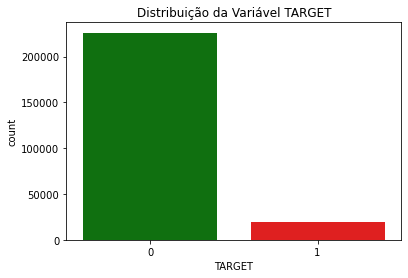

In [7]:
plt.title('Distribuição da Variável TARGET')
sns.countplot(x = df_credit_train.TARGET, palette = ['green', 'red']);

In [8]:
# Verifica se existem registros repetidos na base
df_credit_train.duplicated().value_counts()

False    246008
dtype: int64

In [9]:
df_MEDI = df_credit_train.filter(like='_MEDI', axis=1)
df_AVG = df_credit_train.filter(like='_AVG', axis=1)
df_MODE = df_credit_train.filter(like='_MODE', axis=1)

cols_arbitrary_imputation = df_MEDI.columns.tolist() + df_AVG.columns.tolist() + df_MODE.columns.tolist()




In [10]:
cols_arbitrary_imputation = list(set(cols_arbitrary_imputation) - set(var_cat))

In [11]:
df_credit_train[cols_arbitrary_imputation] = df_credit_train[cols_arbitrary_imputation].fillna(-1)

In [12]:
percent_missing = df_credit_train.isnull().sum() * 100 / len(df_credit_train)
missing_value_df = pd.DataFrame({'column_name': df_credit_train.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)

missing_value_df

,column_name,percent_missing
FONDKAPREMONT_MODE,FONDKAPREMONT_MODE,68.449807
OWN_CAR_AGE,OWN_CAR_AGE,65.997447
EXT_SOURCE_1,EXT_SOURCE_1,56.422149
WALLSMATERIAL_MODE,WALLSMATERIAL_MODE,50.878020
HOUSETYPE_MODE,HOUSETYPE_MODE,50.217879
EMERGENCYSTATE_MODE,EMERGENCYSTATE_MODE,47.462278
OCCUPATION_TYPE,OCCUPATION_TYPE,31.396133
EXT_SOURCE_3,EXT_SOURCE_3,19.807486
AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_MON,13.484114
AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_WEEK,13.484114


df_MEDI.head()

In [13]:
# medidas resumo das variáveis quantitativas
df_credit_train[var_num].describe(percentiles = [.25, .5, .75, .95, .99])

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,246008.000000,246008.000000,246008.000000,2.460080e+05,2.460080e+05,245998.000000,2.457820e+05,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,83649.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246007.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,107205.000000,2.454640e+05,197280.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,245195.000000,245195.000000,245195.000000,245195.000000,246007.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,212836.000000,212836.000000,212836.000000,212836.000000,212836.000000,212836.000000
mean,278280.072908,0.081176,0.415527,1.689122e+05,5.996283e+05,27129.162648,5.389289e+05,0.020882,-16042.794393,63963.755699,-4988.033300,-2991.647642,12.034346,0.999996,0.819481,0.199095,0.998138,0.281023,0.056722,2.150760,2.052092,2.031206,12.064518,0.015186,0.050616,0.040499,0.078254,0.230541,0.179592,0.502277,5.143916e-01,0.510838,-0.450149,-0.549096,0.012236,-0.413553,-0.685641,-0.496522,-0.429547,-0.384355,-0.604401,-0.566961,-0.652216,-0.449095,-0.692102,-0.539588,-0.451706,-0.549455,0.011904,-0.411163,-0.686259,-0.498599,-0.431784,-0.386331,-0.605633,-0.567523,-0.650672,-0.449789,-0

In [15]:
# número de classes únicas de cada variável categórica
df_credit_train[var_cat].nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [16]:
# encontrando correlações com a variável target
correlations = df_credit_train[var_num].corr()['TARGET'].sort_values(ascending = False)

print('Correlações Positivas:')
print(correlations.head(5))
print('\nCorrelações Negativas:')
print(correlations.tail(5))

Correlações Positivas:
TARGET                         1.000000
DAYS_BIRTH                     0.079414
REGION_RATING_CLIENT_W_CITY    0.061518
REGION_RATING_CLIENT           0.059170
DAYS_LAST_PHONE_CHANGE         0.054471
Name: TARGET, dtype: float64

Correlações Negativas:
FLOORSMAX_MEDI   -0.044908
FLOORSMAX_AVG    -0.044918
EXT_SOURCE_1     -0.158619
EXT_SOURCE_2     -0.160978
EXT_SOURCE_3     -0.179246
Name: TARGET, dtype: float64


In [17]:
nan_cols = [i for i in df_credit_train.columns if df_credit_train[i].isnull().any()]

df_credit_train = df_credit_train.drop(columns=nan_cols)

In [69]:
import random
random.seed(5)
cols_considerar = set(random.sample(df_credit_train.columns.tolist() , 60) + ["TARGET"])

In [70]:
df_credit_train_v2 = df_credit_train[cols_considerar]

x_treino, x_teste, y_treino, y_teste = train_test_split(df_credit_train_v2.drop(columns=["TARGET"]),
                                                        df_credit_train_v2["TARGET"],
                                                        test_size = 0.3,
                                                        random_state = 4)

# separação do dataset em variáveis numéricas e categóricas
var_num_m = x_treino.select_dtypes(include = np.number).columns.tolist()
var_cat_m = x_treino.select_dtypes('object').columns.tolist()
    

In [38]:
resultados_geral = pd.DataFrame(columns = ["Modelo", "roc_auc_treino", "roc_auc_teste", "parametros"])

In [71]:
resultados_geral = pd.DataFrame({"Modelo":["a"],
                   "roc_auc_treino":[0],
                   "roc_auc_teste":[0],
                   "parametros": ["a"],
                   })


modelo = lgb.LGBMClassifier(
    colsample_bytree = 0.5, 
    subsample = 0.5,
    subsample_freq = 5,
    random_state = 1
)


parametros = {
    'modelo__num_leaves': [5,10,15,50,100],
    'modelo__max_depth': [5,8,12,20,50],
    'modelo__n_estimators': [100, 250, 400],
    'modelo__learning_rate': [0.05, 0.01],
}



In [73]:
def compara_modelos(modelo=modelo, parametros=parametros, x_treino=x_treino, y_treino=y_treino, x_teste=x_teste, y_teste=y_teste):
    
    modelo=modelo

    pipe_onehotenc = Pipeline(steps = [
        ('pipe_onehotenc', OneHotEncoder(categories="auto",
                                    drop="first",
                                    sparse=False,
                                    handle_unknown='ignore'))
    ])

    pipe_columns = ColumnTransformer(transformers = [
        ('pipe_onehotenc', pipe_onehotenc, var_cat_m),
        ('outras_colunas', 'passthrough', var_num_m),

    ])

    pipe_std = Pipeline(steps = [
        ('pipe_std', StandardScaler())
    ])

    pipeline = Pipeline(steps = [
        ('preproc', pipe_columns),
        ('pipe_std', pipe_std),
        ('modelo', modelo)
    ])

    gscv = GridSearchCV(
        estimator = pipeline,
        param_grid = parametros,
        scoring = 'roc_auc',
        refit = True,
        cv = 3
    )


    gscv.fit(x_treino, y_treino)
    y_pred_treino = gscv.predict_proba(x_treino)[:, 1]
    y_pred_teste = gscv.predict_proba(x_teste)[:, 1]

    roc_auc_treino = roc_auc_score(y_treino, y_pred_treino)
    roc_auc_teste = roc_auc_score(y_teste, y_pred_teste)

    best_params = gscv.best_params_
    
    return roc_auc_treino, roc_auc_teste, best_params

In [74]:

roc_auc_treino, roc_auc_teste, best_params = compara_modelos(modelo=modelo,
                                                            parametros=parametros,
                                                            x_treino = x_treino,
                                                            y_treino=y_treino,
                                                            x_teste = x_teste,
                                                            y_teste = y_teste)

resultados = pd.DataFrame({"Modelo":"LGBM",
                   "roc_auc_treino":roc_auc_treino,
                   "roc_auc_teste":roc_auc_teste,
                   "parametros": [best_params],
                   })

resultados_geral = resultados_geral.append(resultados)

c:\Users\Avell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Avell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Avell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Avell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Avell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Foun

In [75]:
resultados_geral

,Modelo,roc_auc_treino,roc_auc_teste,parametros
0,a,0.000000,0.000000,a
0,LGBM,0.724598,0.652876,"{'modelo__learning_rate': 0.01, 'modelo__max_d..."


In [76]:
modelo = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=200,
    random_state = 1
)


parametros = {
    'modelo__n_estimators': [250, 500],
    'modelo__learning_rate': [0.05, 0.01],
}


roc_auc_treino, roc_auc_teste, best_params = compara_modelos(modelo=modelo,
                                                            parametros=parametros,
                                                            x_treino = x_treino,
                                                            y_treino=y_treino,
                                                            x_teste = x_teste,
                                                            y_teste = y_teste)

resultados = pd.DataFrame({"Modelo":"AdaBoost",
                   "roc_auc_treino":roc_auc_treino,
                   "roc_auc_teste":roc_auc_teste,
                   "parametros": [best_params],
                   })

resultados_geral = resultados_geral.append(resultados)

c:\Users\Avell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Avell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Avell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Avell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Avell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Foun

In [77]:
resultados_geral

,Modelo,roc_auc_treino,roc_auc_teste,parametros
0,a,0.000000,0.000000,a
0,LGBM,0.724598,0.652876,"{'modelo__learning_rate': 0.01, 'modelo__max_d..."
0,AdaBoost,0.676736,0.653458,"{'modelo__learning_rate': 0.05, 'modelo__n_est..."


In [78]:
modelo = GradientBoostingClassifier(
    n_estimators=200,
    random_state = 1
)


parametros = {
    'modelo__n_estimators': [100, 250, 400],
    'modelo__learning_rate': [ 0.01, 0.05],
    'modelo__min_samples_split': [2, 4, 6, 10 ,15],
}


roc_auc_treino, roc_auc_teste, best_params = compara_modelos(modelo=modelo,
                                                            parametros=parametros,
                                                            x_treino = x_treino,
                                                            y_treino=y_treino,
                                                            x_teste = x_teste,
                                                            y_teste = y_teste)

resultados = pd.DataFrame({"Modelo":"GradientBoosting",
                   "roc_auc_treino":roc_auc_treino,
                   "roc_auc_teste":roc_auc_teste,
                   "parametros": [best_params],
                   })

resultados_geral = resultados_geral.append(resultados)

c:\Users\Avell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Avell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Avell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Avell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Avell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Foun

KeyboardInterrupt: 

In [66]:
resultados_geral

,Modelo,roc_auc_treino,roc_auc_teste,parametros
0,a,0.000000,0.000000,a
0,LGBM,0.664017,0.637662,"{'modelo__learning_rate': 0.05, 'modelo__max_d..."
0,AdaBoost,0.652165,0.633898,"{'modelo__learning_rate': 0.05, 'modelo__n_est..."
0,GradientBoosting,0.670269,0.638592,"{'modelo__learning_rate': 0.05, 'modelo__min_s..."


In [67]:
modelo = RandomForestClassifier(
    random_state = 1
)

parametros = {
    'modelo__min_samples_split': [2, 4 ,6 ,10, 20, 100],
    'min_samples_leaf': [2, 4 ,6 ,10, 20, 100],
    #'modelo__max_depth': [2, 4 ]
}

roc_auc_treino, roc_auc_teste, best_params = compara_modelos(modelo=modelo,
                                                            parametros=parametros,
                                                            x_treino = x_treino,
                                                            y_treino=y_treino,
                                                            x_teste = x_teste,
                                                            y_teste = y_teste)

resultados = pd.DataFrame({"Modelo":"RandomForest",
                   "roc_auc_treino":roc_auc_treino,
                   "roc_auc_teste":roc_auc_teste,
                   "parametros": [best_params],
                   })

resultados_geral = resultados_geral.append(resultados)

ValueError: Invalid parameter 'min_samples_leaf' for estimator Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('pipe_onehotenc',
                                                  Pipeline(steps=[('pipe_onehotenc',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['NAME_INCOME_TYPE',
                                                   'CODE_GENDER']),
                                                 ('outras_colunas',
                                                  'passthrough',
                                                  ['FLAG_EMAIL',
                                                   'NONLIVINGAPARTMENTS_AVG',
                                                   'LIVINGAREA_MODE',
                                                   'ENTRANCES_MEDI',
                                                   'CNT_CHILDREN',
                                                   'FLOORSMAX_ME...
                                                   'FLAG_DOCUMENT_12',
                                                   'FLAG_DOCUMENT_17',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'FLAG_DOCUMENT_2',
                                                   'YEARS_BUILD_MODE',
                                                   'DAYS_ID_PUBLISH',
                                                   'YEARS_BEGINEXPLUATATION_MEDI',
                                                   'APARTMENTS_AVG',
                                                   'LIVINGAPARTMENTS_MEDI',
                                                   'APARTMENTS_MEDI',
                                                   'HOUR_APPR_PROCESS_START', ...])])),
                ('pipe_std', Pipeline(steps=[('pipe_std', StandardScaler())])),
                ('modelo', RandomForestClassifier(random_state=1))]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [35]:
resultados_geral

,Modelo,roc_auc_treino,roc_auc_teste,parametros
0,a,0.000000,0.000000,a
0,LGBM,0.669180,0.622555,"{'modelo__learning_rate': 0.05, 'modelo__max_d..."
0,AdaBoost,0.623425,0.611588,"{'modelo__learning_rate': 0.05, 'modelo__n_est..."
0,GradientBoosting,0.625014,0.609054,"{'modelo__learning_rate': 0.01, 'modelo__min_s..."
0,RandomForest,0.998622,0.554999,{'modelo__min_samples_split': 4}


---